# Anti sYsmo

El presente modelo tiene como objetivo medir el daño en la mampostería no estructural considerando la variable de intensidad. Es importante destacar que los datos utilizados en este dataset están disponibles en el Centro Geológico Colombiano.

In [1]:
#Libreria que necesitan para el modelo

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline #Libreria que me permite tener gasto computacional
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)

In [3]:
#Carga del dataset

In [4]:
df_2024 = pd.read_csv("C:/Users/user/Desktop/Proyect ML - UN/Proyecto SISMO - Codigo/BBDD Servicio Geologico/2024.csv",delimiter=";")
df_2018 = pd.read_csv("C:/Users/user/Desktop/Proyect ML - UN/Proyecto SISMO - Codigo/BBDD Servicio Geologico/2018.csv",delimiter=";")

In [5]:
#Organizar el dataset de 2024 y normalizar los datos
df2 = df_2024
df1 = df_2018


In [6]:
#Eliminar columnas que no sirven en el modelo
df2 = df2.drop(columns=["QuakeML","Fases","Mapa","Estado","Tipo Mag.","Fases.1"])
df1 = df1.drop(columns=["ESTADO","MAGNITUD Mw","# FASES","DEPARTAMENTO"])

In [7]:
#Normalizar los datos y columnas con el mismo nombre de las columnas 
df1 = df1.rename(columns={"FECHA":"Fecha",
                            "HORA_UTC":"Hora",
                            "LATITUD (grados)":"Latitud",
                            "LONGITUD (grados)":"Longitud",
                            "PROFUNDIDAD (Km)":"Profundidad (Km)",
                            "MAGNITUD Ml":"Magnitud (MI)",
                            "DEPARTAMENTO":"Departamento",
                            "MUNICIPIO":"Municipio",
                            "RMS (Seg)":"Rms (Seg) / Velocidad del sismo",
                            "GAP (grados)":"Gap (Grados)",
                            "ERROR LATITUD (Km)":"Error Latitud (Km)",
                            "ERROR LONGITUD (Km)":"Error Longitud (Km)",
                            "ERROR PROFUNDIDAD (Km)":"Error Profundidad (Km)",
                            "INTENSIDAD":"Intensidad"})

df2 = df2.rename(columns={ "Fecha-Hora":"Fecha",
                            "(UTC)":"Hora",
                            "Lat(°)":"Latitud",
                            "Long(°)":"Longitud",
                            "Prof(Km)":"Profundidad (Km)",
                            "Mag.":"Magnitud (MI)",
                            "Rms(Seg)":"Rms (Seg) / Velocidad del sismo",
                            "Gap(°)":"Gap (Grados)",
                            "Error Lat(Km)":"Error Latitud (Km)",
                            "Error Long(Km)":"Error Longitud (Km)",
                            "Error Prof(Km)":"Error Profundidad (Km)",
                            "Region":"Municipio",
                            "Intensidad":"Intensidad"  
    
}
)   

In [8]:
df1 = df1[["Fecha","Hora","Latitud","Longitud","Profundidad (Km)","Magnitud (MI)","Rms (Seg) / Velocidad del sismo","Gap (Grados)","Error Latitud (Km)","Error Longitud (Km)","Error Profundidad (Km)","Municipio","Intensidad"]]

In [9]:
df2 = df2[["Fecha","Hora","Latitud","Longitud","Profundidad (Km)","Magnitud (MI)","Rms (Seg) / Velocidad del sismo","Gap (Grados)","Error Latitud (Km)","Error Longitud (Km)","Error Profundidad (Km)","Municipio","Intensidad"]]

In [10]:
# Para colocar los datos en minuscula y delimitar la columna muncipio y quitar la palabra Antioquia
df2["Municipio"] = df2["Municipio"].str.split(" - ").str[0]
df1["Municipio"] = df1["Municipio"].str.lower()
df1["Municipio"].str.lower().inplace=True

# Información de los Datos

Dividir en caracteristicas (x) y etiquetas (y)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10563 entries, 0 to 10562
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Fecha                            10563 non-null  object 
 1   Hora                             10563 non-null  object 
 2   Latitud                          10563 non-null  float64
 3   Longitud                         10563 non-null  float64
 4   Profundidad (Km)                 10563 non-null  float64
 5   Magnitud (MI)                    10563 non-null  float64
 6   Rms (Seg) / Velocidad del sismo  10541 non-null  float64
 7   Gap (Grados)                     10541 non-null  float64
 8   Error Latitud (Km)               10541 non-null  float64
 9   Error Longitud (Km)              10541 non-null  float64
 10  Error Profundidad (Km)           10541 non-null  float64
 11  Municipio                        10563 non-null  object 
 12  Intensidad        

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11611 entries, 0 to 11610
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Fecha                            11611 non-null  object 
 1   Hora                             11611 non-null  object 
 2   Latitud                          11611 non-null  float64
 3   Longitud                         11611 non-null  float64
 4   Profundidad (Km)                 11611 non-null  float64
 5   Magnitud (MI)                    11611 non-null  float64
 6   Rms (Seg) / Velocidad del sismo  11611 non-null  float64
 7   Gap (Grados)                     11611 non-null  int64  
 8   Error Latitud (Km)               11611 non-null  float64
 9   Error Longitud (Km)              11611 non-null  float64
 10  Error Profundidad (Km)           11611 non-null  float64
 11  Municipio                        11611 non-null  object 
 12  Intensidad        

In [13]:
#Cambiar los datos de *Gap (Grados)* pasarlo a int64 el archivo df1*

In [14]:
df1["Gap (Grados)"] = df1["Gap (Grados)"].fillna(0.0).astype("int64")

# Unir los datos

In [15]:
df = pd.concat([df1,df2], axis=0)

In [16]:
#cantidad de valores nulos o vacios 
df.isnull().sum()

Fecha                               0
Hora                                0
Latitud                             0
Longitud                            0
Profundidad (Km)                    0
Magnitud (MI)                       0
Rms (Seg) / Velocidad del sismo    22
Gap (Grados)                        0
Error Latitud (Km)                 22
Error Longitud (Km)                22
Error Profundidad (Km)             22
Municipio                           0
Intensidad                          0
dtype: int64

In [17]:
#Esos valores vacios los voy a reemplazar con la media de los datos de cada fila para quitar los valores nulos.

In [18]:
df["Rms (Seg) / Velocidad del sismo"].fillna(df["Rms (Seg) / Velocidad del sismo"].median(), inplace=True)
df["Error Latitud (Km)"].fillna(df["Error Latitud (Km)"].median(), inplace=True)
df["Error Longitud (Km)"].fillna(df["Error Longitud (Km)"].median(), inplace=True)
df["Error Profundidad (Km)"].fillna(df["Error Profundidad (Km)"].median(), inplace=True)

In [19]:
df.isnull().sum()

Fecha                              0
Hora                               0
Latitud                            0
Longitud                           0
Profundidad (Km)                   0
Magnitud (MI)                      0
Rms (Seg) / Velocidad del sismo    0
Gap (Grados)                       0
Error Latitud (Km)                 0
Error Longitud (Km)                0
Error Profundidad (Km)             0
Municipio                          0
Intensidad                         0
dtype: int64

In [20]:
#Cambiar el formato de la fecha de str a int

In [21]:
df["Fecha"] = pd.to_datetime(df["Fecha"], format="%d/%m/%Y")

In [22]:
df["Hora"] = pd.to_datetime(df["Hora"], format="%H:%M:%S").dt.time

# División de los Datos

Dividr los datos para tomar la variable que vamos a predecir y cuales serian las caracteristicas. 

In [25]:
X = df.drop(columns="Intensidad")
y = df["Intensidad"] #Esta será la variable que vamos a predecir.

In [26]:
#Dividir los datos en conjuntos de entrenamiento y prueba

In [27]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

#Vamos a realizar el testeo de los datos 80% - 20%, ese 20% será mi porcentaje de entrenamiento

In [28]:
#identificar mis variables categoricas y numericas
#Variables Numéricas (cuantitativas):

'''
Variables Numéricas 
Latitud (float64)
Longitud (float64)
Profundidad (Km) (float64)
Magnitud (MI) (float64)
Rms (Seg) / Velocidad del sismo (float64)
Gap (Grados) (int64)
Error Latitud (Km) (float64)
Error Longitud (Km) (float64)
Error Profundidad (Km) (float64)

Variables Categóricas 

Fecha datetime64[ns]
Hora (object)
Municipio (object)
Intensidad (int64)'''

'\nVariables Numéricas \nLatitud (float64)\nLongitud (float64)\nProfundidad (Km) (float64)\nMagnitud (MI) (float64)\nRms (Seg) / Velocidad del sismo (float64)\nGap (Grados) (int64)\nError Latitud (Km) (float64)\nError Longitud (Km) (float64)\nError Profundidad (Km) (float64)\n\nVariables Categóricas \n\nFecha datetime64[ns]\nHora (object)\nMunicipio (object)\nIntensidad (int64)'

In [29]:
categorical_features = ["Fecha","Hora","Municipio"] #No incluir "Intensidad" porqué será mi target
numerical_features = ["Latitud","Longitud","Profundidad (Km)","Magnitud (MI)","Rms (Seg) / Velocidad del sismo","Gap (Grados)","Error Latitud (Km)","Error Longitud (Km)","Error Profundidad (Km)"]

# Preprocesamiento para las variables numericas / categoricas

In [30]:
#Me hará los cambios de 0 a 1 de los datos
numerical_transformer = MinMaxScaler()

#Aqui utilizaré OneHot para realizar el cambio de la variable categoricas
categorical_transformer = OneHotEncoder(handle_unknown="ignore") #handle_unknown="ignore" me ayuda para los valores que estan faltantes al momento de la prediccion y el entrenamiento ignorarlo.

In [31]:
preprocessor = ColumnTransformer(
    transformers= [
        ("encoder", categorical_transformer, categorical_features),
        ("numerica", numerical_transformer, numerical_features)
    ]
)

# Creacion del Pipeline

In [32]:
Pipeline = Pipeline([
    ("preprocessor",preprocessor),
    ("feature_selection",SelectKBest(score_func=f_classif, k=10)), #Donde K será los mejores parametros
    ("classifier", LogisticRegression(max_iter=1000, random_state=42)) #Maximo de iteraciones será de 1000
]) 

# Optimizacion de Hiperparámetros

In [33]:
param_grid = {
    "feature_selection__k":[5,7,10],
    "classifier__C":[0.1,1,10],
    "classifier__solver":["liblinear","ibfgs"]
}

In [34]:
grid_search = GridSearchCV(Pipeline, param_grid, cv=2, scoring="balanced_accuracy",n_jobs=1,refit=True)
grid_search.fit(X_train, y_train)

c:\Users\user\Downloads\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\Downloads\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\Downloads\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\user\Downloads\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, 

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Fecha',
                                                                          'Hora',
                                                                          'Municipio']),
                                                                        ('numerica',
                                                                         MinMaxScaler(),
                                                                         ['Latitud',
                                                                          'Longitud',
                                                                          'Profundidad '
                                                                          '(Km)',
                                                                          'Magnitud '
                                                                          '(MI)',
                                                                          'Rms '
                                                                          '(Seg) '
                                                                          '/ '
                                                                          'Velocidad '
                                                                          'del '
                                                                          'sismo',
                                                                          'Gap '
                                                                          '(Grados)',
                                                                          'Error '
                                                                          'Latitud '
                                                                          '(Km)',
                                                                          'Error '
                                                                          'Longitud '
                                                                          '(Km)',
                                                                          'Error '
                                                                          'Profundidad '
                                                                          '(Km)'])])),
                                       ('feature_selection', SelectKBest()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=1,
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__solver': ['liblinear', 'ibfgs'],
                         'feature_selection__k': [5, 7, 10]},
             scoring='balanced_accuracy')

In [35]:
print("Mejores parámetros: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Mejores parámetros:  {'classifier__C': 10, 'classifier__solver': 'liblinear', 'feature_selection__k': 5}


# Evaluacion del modelo

In [36]:
# Predicciones
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [37]:
# Métricas
metrics = {
    "Train": {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Balanced accuracy": balanced_accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred, average='macro'),
        "Recall": recall_score(y_train, y_train_pred, average='macro'),
        "F1-Score": f1_score(y_train, y_train_pred, average='macro')
    },
    "Test": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Balanced accuracy": balanced_accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred, average='macro'),
        "Recall": recall_score(y_test, y_test_pred, average='macro'),
        "F1-Score": f1_score(y_test, y_test_pred, average='macro')
    }
}

print(metrics)

{'Train': {'Accuracy': 0.3474829471785332, 'Balanced accuracy': 0.1472555920758472, 'Precision': 0.14119154662505168, 'Recall': 0.1472555920758472, 'F1-Score': 0.12935697310772595}, 'Test': {'Accuracy': 0.3397970687711387, 'Balanced accuracy': 0.11277954122718295, 'Precision': 0.08029200850578196, 'Recall': 0.11277954122718295, 'F1-Score': 0.0866391514784546}}


c:\Users\user\Downloads\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\Downloads\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
'''macro: Calcula la métrica de manera independiente para cada clase y luego toma el promedio. Trata todas las clases por igual.
micro: Calcula las métricas globalmente considerando todas las instancias de todas las clases.
weighted: Similar a macro, pero pondera las métricas de cada clase por el número de instancias en esa clase.'''

'macro: Calcula la métrica de manera independiente para cada clase y luego toma el promedio. Trata todas las clases por igual.\nmicro: Calcula las métricas globalmente considerando todas las instancias de todas las clases.\nweighted: Similar a macro, pero pondera las métricas de cada clase por el número de instancias en esa clase.'

# Grafica de precisión del modelo

Grafica donde puedo ver la precision del modelo y el peso de la presion que esta generando en los datos

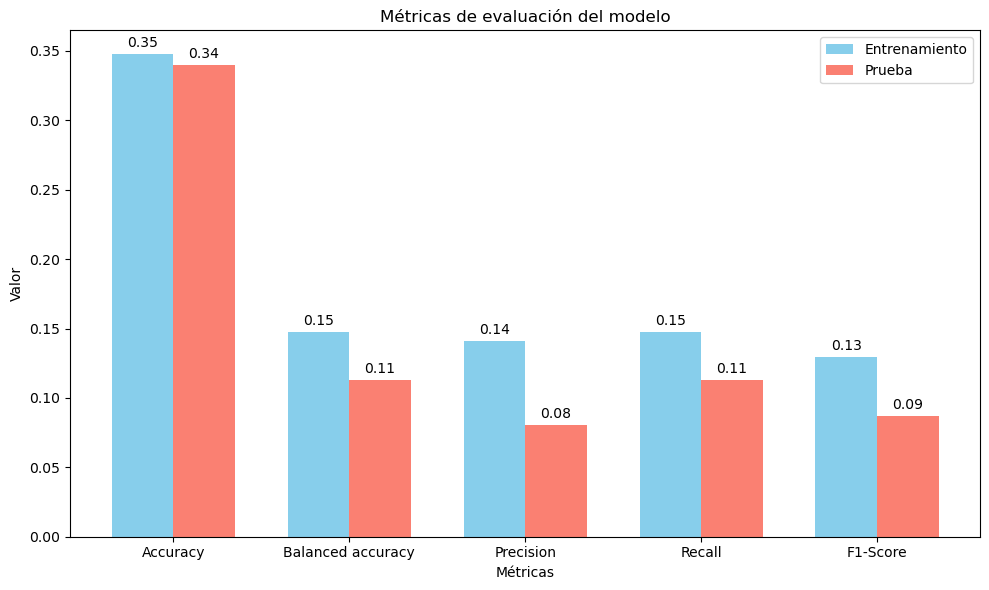

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Datos de las métricas
metrics_names = list(metrics["Train"].keys())
train_metrics = list(metrics["Train"].values())
test_metrics = list(metrics["Test"].values())

# Configuración del gráfico
x = np.arange(len(metrics_names))  # Posición de las métricas
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Barras para los datos de entrenamiento y prueba
bars1 = ax.bar(x - width/2, train_metrics, width, label="Entrenamiento", color="skyblue")
bars2 = ax.bar(x + width/2, test_metrics, width, label="Prueba", color="salmon")

# Etiquetas y título
ax.set_xlabel("Métricas")
ax.set_ylabel("Valor")
ax.set_title("Métricas de evaluación del modelo")
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Mostrar valores en las barras
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Desplazamiento de texto
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

La siguiente función me permite medir la intensidad sismica bajo los parametros que maneja el servicio geologico colombiano.

In [42]:
# Función para clasificar daño basado en la intensidad
def classify_damage(intensity):
    if intensity <= 1:
        return "No sentido"
    elif intensity == 2:
        return"Apenas sentido"
    elif intensity == 3:
        return "Sentido Levemente"
    elif intensity == 4:
        return "Sentido ampliamente"
    elif intensity == 5:
        return "Sentido fuertemente"
    elif intensity == 6:
        return "Daño Leve"
    elif intensity == 7:
        return "Daño Moderado"
    elif intensity == 8:
        return "Daño Severo"
    elif intensity == 9:
        return "Daño Destructivo"
    elif intensity == 10:
        return "Daño muy destructivo"
    elif intensity == 11:
        return "Devastador"
    else:
        return "Completamente Devastador "
    
'''No sentido
1 No sentido
2 Apenas sentido
3 Sentido Levemente
4 Sentido ampliamente
5 Sentido fuertemente
6 Daño Leve
7 Daño Moderado
8 Daño Severo
9 Daño Destructivo
10 Daño muy destructivo
11 Devastador
12 Completamente Devastador'''

#Escala macrosísmica europea


# Predicción interactiva
def predict_damage(model, categorical_features, numerical_features):
    print("Introduce las características del sismo para predecir el daño:")
    
    # Recolectar datos
    user_input = {}
    for feature in numerical_features:
        user_input[feature] = float(input(f"Ingrese el valor para {feature}: "))
    
    for feature in categorical_features:
        user_input[feature] = input(f"Ingrese el valor para {feature}: ")

    # Crear DataFrame con entrada del usuario
    user_data = pd.DataFrame([user_input])
    
    # Preprocesar y predecir
    intensity_pred = model.predict(user_data)[0]
    damage_category = classify_damage(intensity_pred)
    
    print(f"\nPredicción de Intensidad: {intensity_pred}")
    print(f"Categoría de Daño: {damage_category}")

# Simulación del modelo ajustado (utilizando tu pipeline y datos de entrenamiento)
categorical_features = ["Fecha", "Hora", "Municipio"]
numerical_features = ["Latitud", "Longitud", "Profundidad (Km)", "Magnitud (MI)", 
                      "Rms (Seg) / Velocidad del sismo", "Gap (Grados)", 
                      "Error Latitud (Km)", "Error Longitud (Km)", "Error Profundidad (Km)"]

# Mejor modelo obtenido de GridSearchCV
best_model = grid_search.best_estimator_

# Interacción
predict_damage(best_model, categorical_features, numerical_features)

Introduce las características del sismo para predecir el daño:


ValueError: could not convert string to float: ''